In [1]:
%load_ext lab_black
%matplotlib inline

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx

In [3]:
dep_url = "https://www.data.gouv.fr/fr/datasets/r/eb36371a-761d-44a8-93ec-3d728bec17ce"

In [4]:
# Kontur data to be downloaded here: https://data.humdata.org/dataset/kontur-population-dataset
kontur_file = "kontur_population_FR_20220630.gpkg"

In [5]:
gdf = gpd.read_file(kontur_file)
gdf["centre"] = gdf["geometry"].centroid
print(gdf.shape)
gdf.head()

(620573, 4)


,h3,population,geometry,centre
0,8818495607fffff,237.0,"POLYGON ((-161774.289 5384297.406, -162436.281...",POINT (-161885.359 5383562.122)
1,8818495601fffff,678.0,"POLYGON ((-161001.188 5385273.656, -161663.219...",POINT (-161112.318 5384538.355)
2,88184955edfffff,82.0,"POLYGON ((-174352.586 5375538.188, -175014.430...",POINT (-174462.807 5374802.855)
3,88184955ebfffff,125.0,"POLYGON ((-172698.031 5374058.344, -173359.727...",POINT (-172808.334 5373323.166)
4,88184955e9fffff,244.0,"POLYGON ((-173139.203 5375286.875, -173800.992...",POINT (-173249.490 5374551.623)


In [6]:
dep_gdf = gpd.read_file(dep_url)
loz_gdf = dep_gdf.query("nom=='Lozère'")
loz_gdf.head()

,code_insee,nom,nuts3,wikipedia,surf_km2,geometry
95,48,Lozère,FR814,fr:Lozère (département),5175.0,"POLYGON ((2.98226 44.64515, 2.98304 44.64546, ..."


In [7]:
loz_poly = loz_gdf.to_crs("epsg:3857").iloc[0]["geometry"]

In [8]:
sgdf = gdf[gdf["centre"].within(loz_poly)]
print(sgdf.shape)

(3978, 4)


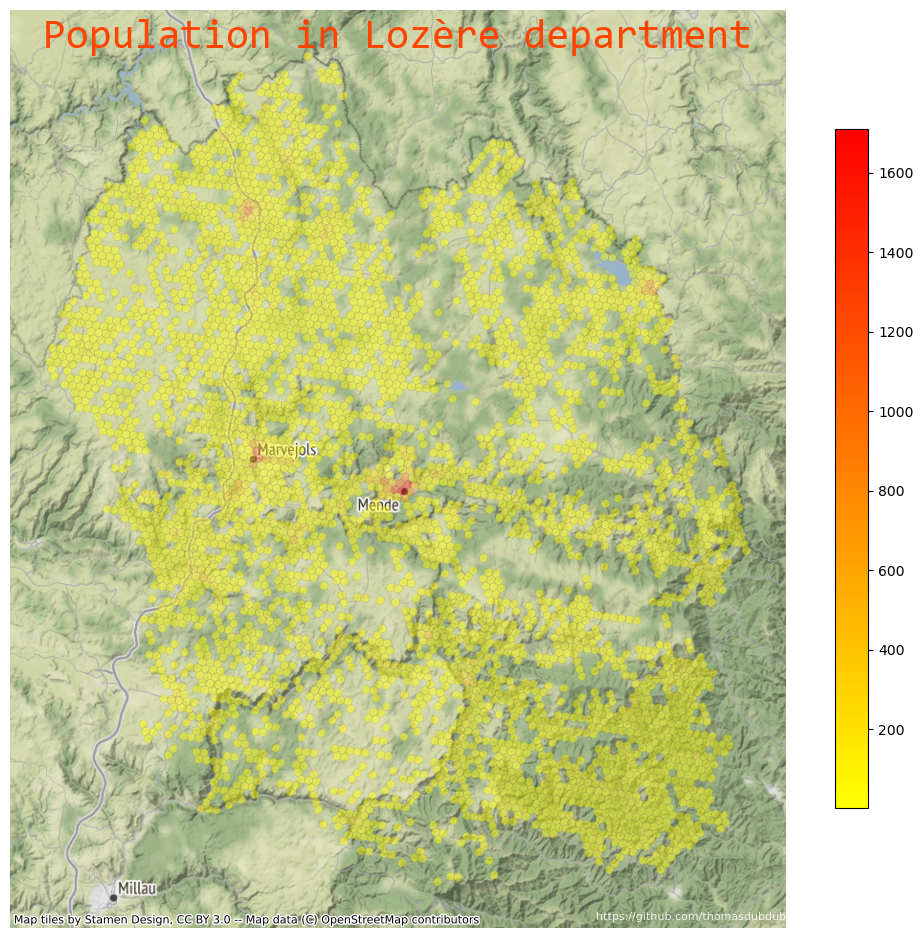

In [9]:
f, ax = plt.subplots(figsize=(10, 10))
sgdf.plot(
    ax=ax,
    column="population",
    cmap="autumn_r",
    edgecolor="dimgrey",
    linewidth=0.2,
    alpha=0.45,
    legend=True,
    legend_kwds={"shrink": 0.7},
)
cx.add_basemap(ax, source=cx.providers.Stamen.Terrain, alpha=1.0, zoom=10)
plt.title(
    "Population in Lozère department",
    fontsize=30,
    fontname="Consolas",
    color="orangered",
    y=0.95,
    loc="center",
)
plt.title(
    "https://github.com/thomasdubdub",
    fontsize=8,
    color="snow",
    alpha=0.9,
    y=0.00,
    loc="right",
)
ax.axis("off")
ax.margins(0)
ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
plt.tight_layout()
plt.savefig("lozere.png", dpi=150, bbox_inches="tight", pad_inches=0)